# Scikit-learn Primer

**Scikit-learn** (http://scikit-learn.org/) is an open-source machine learning library for Python that offers a variety of regression, classification and clustering algorithms.

In this section we'll perform a fairly simple classification exercise with scikit-learn. In the next section we'll leverage the machine learning strength of scikit-learn to perform natural language classifications.

# Installation and Setup

### From the command line or terminal:
> `conda install scikit-learn`
> <br>*or*<br>
> `pip install -U scikit-learn`

Scikit-learn additionally requires that NumPy and SciPy be installed. For more info visit http://scikit-learn.org/stable/install.html

# Perform Imports and Load Data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.<br>You can check out the [**sms_readme**](../TextFiles/sms_readme.txt) file for more info.

The file is a [tab-separated-values](https://en.wikipedia.org/wiki/Tab-separated_values) (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/nlp-udemy-dataset/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
len(df)

5572

## Check for missing values:
Machine learning models usually require complete data.

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

## Take a quick look at the *ham* and *spam* `label` column:

In [6]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<font color=green>We see that 4825 out of 5572 messages, or 86.6%, are ham.<br>This means that any machine learning model we create has to perform **better than 86.6%** to beat random chance.</font>

## Visualize the data:
Since we're not ready to do anything with the message text, let's see if we can predict ham/spam labels based on message length and punctuation counts. We'll look at message `length` first:

In [8]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<font color=green>This dataset is extremely skewed. The mean value is 80.5 and yet the max length is 910. Let's plot this on a logarithmic x-axis.</font>

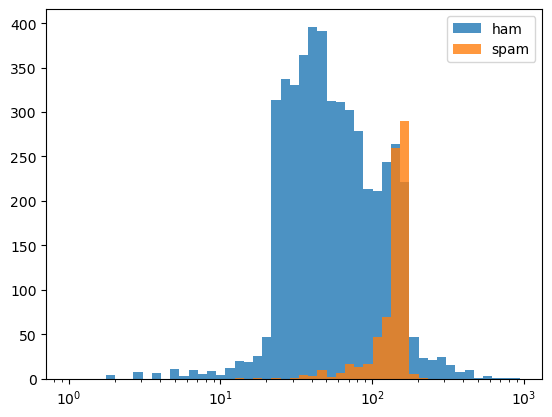

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [10]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

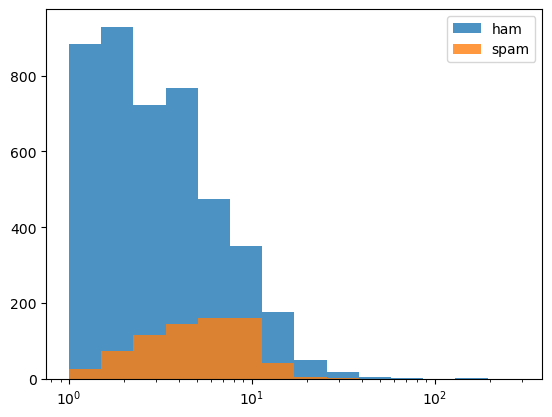

In [11]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

<font color=green>This looks even worse - there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results.</font>

___
# Split the data into train & test sets:

If we wanted to divide the DataFrame into two smaller sets, we could use
> `train, test = train_test_split(df)`

For our purposes let's also set up our Features (X) and Labels (y). The Label is simple - we're trying to predict the `label` column in our data. For Features we'll use the `length` and `punct` columns. *By convention, **X** is capitalized and **y** is lowercase.*

## Selecting features
There are two ways to build a feature set from the columns we want. If the number of features is small, then we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

These operations make copies of **df**, but do not change the original DataFrame in place. All the original data is preserved.

In [12]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


___
# Train a Logistic Regression classifier
One of the simplest multi-class classification tools is [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Scikit-learn offers a variety of algorithmic solvers; we'll use [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS). 

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression()

## Test the Accuracy of the Model

In [15]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [16]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


<font color=green>These results are terrible! More spam messages were confused as ham (241) than correctly identified as spam (5), although a relatively small number of ham messages (46) were confused as spam.</font>

In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [18]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


___
# Train a naïve Bayes classifier:
One of the most common - and successful - classifiers is [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [19]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

## Run predictions and report on metrics

In [20]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


<font color=green>The total number of confusions dropped from **287** to **256**. [241+46=287, 246+10=256]</font>

In [21]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [22]:
print(metrics.accuracy_score(y_test,predictions))

0.8607939097335509


___
# Train a support vector machine (SVM) classifier
Among the SVM options available, we'll use [C-Support Vector Classification (SVC)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [23]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(gamma='auto')

## Run predictions and report on metrics

In [24]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1515   78]
 [ 131  115]]


<font color=green>The total number of confusions dropped even further to **209**.</font>

In [25]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

    accuracy                           0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



In [26]:
print(metrics.accuracy_score(y_test,predictions))

0.8863512778684067


# Building a Natural Language Processor From Scratch
In this section we'll use basic Python to build a rudimentary NLP system. We'll build a *corpus of documents* (two small text files), create a *vocabulary* from all the words in both documents, and then demonstrate a *Bag of Words* technique to extract features from each document.<br>
<div class="alert alert-info" style="margin: 20px">**This first section is for illustration only!**
<br>Don't bother memorizing the code - we'd never do this in real life.</div>

## Start with some documents:
For simplicity we won't use any punctuation.

In [27]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are furry animals

Writing 1.txt


In [28]:
%%writefile 2.txt
This story is about surfing
Catching waves is fun
Surfing is a popular water sport

Writing 2.txt


## Build a vocabulary
The goal here is to build a numerical array from all the words that appear in every document. Later we'll create instances (vectors) for each individual document.

In [29]:
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [30]:
with open('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]=i
        i+=1

print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


Even though `2.txt` has 15 words, only 7 new words were added to the dictionary.

## Feature Extraction
Now that we've encapsulated our "entire language" in a dictionary, let's perform *feature extraction* on each of our original documents:

In [31]:
# Create an empty vector with space for each word in the vocabulary:
one = ['1.txt']+[0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
# map the frequencies of each word in 1.txt to our vector:
with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    one[vocab[word]]+=1
    
one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

<font color=green>We can see that most of the words in 1.txt appear only once, although "cats" appears twice.</font>

In [33]:
# Do the same for the second document:
two = ['2.txt']+[0]*len(vocab)

with open('2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    two[vocab[word]]+=1

In [34]:
# Compare the two vectors:
print(f'{one}\n{two}')

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


By comparing the vectors we see that some words are common to both, some appear only in `1.txt`, others only in `2.txt`. Extending this logic to tens of thousands of documents, we would see the vocabulary dictionary grow to hundreds of thousands of words. Vectors would contain mostly zero values, making them *sparse matrices*.

## Bag of Words and Tf-idf
In the above examples, each vector can be considered a *bag of words*. By itself these may not be helpful until we consider *term frequencies*, or how often individual words appear in documents. A simple way to calculate term frequencies is to divide the number of occurrences of a word by the total number of words in the document. In this way, the number of times a word appears in large documents can be compared to that of smaller documents.

However, it may be hard to differentiate documents based on term frequency if a word shows up in a majority of documents. To handle this we also consider *inverse document frequency*, which is the total number of documents divided by the number of documents that contain the word. In practice we convert this value to a logarithmic scale, as described [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency).

Together these terms become [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

## Stop Words and Word Stems
Some words like "the" and "and" appear so frequently, and in so many documents, that we needn't bother counting them. Also, it may make sense to only record the root of a word, say `cat` in place of both `cat` and `cats`. This will shrink our vocab array and improve performance.

## Tokenization and Tagging
When we created our vectors the first thing we did was split the incoming text on whitespace with `.split()`. This was a crude form of *tokenization* - that is, dividing a document into individual words. In this simple example we didn't worry about punctuation or different parts of speech. In the real world we rely on some fairly sophisticated *morphology* to parse text appropriately.

Once the text is divided, we can go back and *tag* our tokens with information about parts of speech, grammatical dependencies, etc. This adds more dimensions to our data and enables a deeper understanding of the context of specific documents. For this reason, vectors become ***high dimensional sparse matrices***.

<div class="alert alert-info" style="margin: 20px">**That's the end of the first section.**
<br>In the next section we'll use scikit-learn to perform a real-life analysis.</div>

___
# Feature Extraction from Text
In the **Scikit-learn Primer** lecture we applied a simple SVC classification model to the SMSSpamCollection dataset. We tried to predict the ham/spam label based on message length and punctuation counts. In this section we'll actually look at the text of each message and try to perform a classification based on content. We'll take advantage of some of scikit-learn's [feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) tools.

## Load a dataset

In [35]:
# Perform imports and load the dataset:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/nlp-udemy-dataset/smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Check for missing values:
Always a good practice.

In [36]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

## Take a quick look at the *ham* and *spam* `label` column:

In [37]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<font color=green>4825 out of 5572 messages, or 86.6%, are ham. This means that any text classification model we create has to perform **better than 86.6%** to beat random chance.</font>

## Split the data into train & test sets:

In [38]:
from sklearn.model_selection import train_test_split

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Scikit-learn's CountVectorizer
Text preprocessing, tokenizing and the ability to filter out stopwords are all included in [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), which builds a dictionary of features and transforms documents to feature vectors.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

<font color=green>This shows that our training set is comprised of 3733 documents, and 7082 features.</font>

## Transform Counts to Frequencies with Tf-idf
While counting words is helpful, longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid this we can simply divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called **tf** for Term Frequencies.

Another refinement on top of **tf** is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called **tf–idf** for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html):

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

Note: the `fit_transform()` method actually performs two operations: it fits an estimator to the data and then transforms our count-matrix to a tf-idf representation.

## Combine Steps with TfidVectorizer
In the future, we can combine the CountVectorizer and TfidTransformer steps into one using [TfidVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html):

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

## Train a Classifier
Here we'll introduce an SVM classifier that's similar to SVC, called [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [42]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

## Build a Pipeline
Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set we'll have to submit it to the same procedures. Fortunately scikit-learn offers a [**Pipeline**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class that behaves like a compound classifier.

In [43]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Test the classifier and display results

In [44]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [45]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [46]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [47]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037


# Text Classification Project
Now we're at the point where we should be able to:
* Read in a collection of documents - a *corpus*
* Transform text into numerical vector data using a pipeline
* Create a classifier
* Fit/train the classifier
* Test the classifier on new data
* Evaluate performance

For this project we'll use the Cornell University Movie Review polarity dataset v2.0 obtained from http://www.cs.cornell.edu/people/pabo/movie-review-data/

In this exercise we'll try to develop a classification model as we did for the SMSSpamCollection dataset - that is, we'll try to predict the Positive/Negative labels based on text content alone. In an upcoming section we'll apply *Sentiment Analysis* to train models that have a deeper understanding of each review.

## Perform imports and load the dataset
The dataset contains the text of 2000 movie reviews. 1000 are positive, 1000 are negative, and the text has been preprocessed as a tab-delimited file.

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/moviereviews/moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [49]:
len(df)

2000

### Take a look at a typical review. This one is labeled "negative":

In [50]:
from IPython.display import Markdown, display
display(Markdown('> '+df['review'][0]))

> how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates between unfunny scenes of the brothers bickering over what to do with their inheritance and endless action sequences as the two take on their increasingly determined furry foe . 
whatever promise the film starts with soon deteriorates into boring dialogue , terrible overacting , and increasingly uninspired slapstick that becomes all sound and fury , signifying nothing . 
the script becomes so unspeakably bad that the best line poor lee evens can utter after another run in with the rodent is : " i hate that mouse " . 
oh cringe ! 
this is home alone all over again , and ten times worse . 
one touching scene early on is worth mentioning . 
we follow the mouse through a maze of walls and pipes until he arrives at his makeshift abode somewhere in a wall . 
he jumps into a tiny bed , pulls up a makeshift sheet and snuggles up to sleep , seemingly happy and just wanting to be left alone . 
it's a magical little moment in an otherwise soulless film . 
a message to speilberg : if you want dreamworks to be associated with some kind of artistic credibility , then either give all concerned in mouse hunt a swift kick up the arse or hire yourself some decent writers and directors . 
this kind of rubbish will just not do at all . 


## Check for missing values:
We have intentionally included records with missing data. Some have NaN values, others have short strings composed of only spaces. This might happen if a reviewer declined to provide a comment with their review. We will show two ways using pandas to identify and remove records containing empty data.
* NaN records are efficiently handled with [.isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [.dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
* Strings that contain only whitespace can be handled with [.isspace()](https://docs.python.org/3/library/stdtypes.html#str.isspace), [.itertuples()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.itertuples.html), and [.drop()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

### Detect & remove NaN values:

In [51]:
# Check for the existence of NaN values in a cell:
df.isnull().sum()

label      0
review    35
dtype: int64

35 records show **NaN** (this stands for "not a number" and is equivalent to *None*). These are easily removed using the `.dropna()` pandas function.
<div class="alert alert-info" style="margin: 20px">CAUTION: By setting inplace=True, we permanently affect the DataFrame currently in memory, and this can't be undone. However, it does *not* affect the original source data. If we needed to, we could always load the original DataFrame from scratch.</div>

In [52]:
df.dropna(inplace=True)

len(df)

1965

### Detect & remove empty strings
Technically, we're dealing with "whitespace only" strings. If the original .tsv file had contained empty strings, pandas **.read_csv()** would have assigned NaN values to those cells by default.

In order to detect these strings we need to iterate over each row in the DataFrame. The **.itertuples()** pandas method is a good tool for this as it provides access to every field. For brevity we'll assign the names `i`, `lb` and `rv` to the `index`, `label` and `review` columns.

In [53]:
blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

27 blanks:  [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [54]:
df.drop(blanks, inplace=True)

len(df)

1938

Great! We dropped 62 records from the original 2000. Let's continue with the analysis.Great! We dropped 62 records from the original 2000. Let's continue with the analysis.
## Take a quick look at the `label` column:

In [55]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

## Split the data into train & test sets:

In [56]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

## Feed the training data through the first pipeline
We'll run naïve Bayes first

In [58]:
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Run predictions and analyze the results (naïve Bayes)

In [59]:
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

In [60]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[287  21]
 [130 202]]


In [61]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

    accuracy                           0.76       640
   macro avg       0.80      0.77      0.76       640
weighted avg       0.80      0.76      0.76       640



In [62]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7640625


Naïve Bayes gave us better-than-average results at 76.4% for classifying reviews as positive or negative based on text alone. Let's see if we can do better.

## Feed the training data through the second pipeline
Next we'll run Linear SVC

In [63]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Run predictions and analyze the results (Linear SVC)

In [64]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [65]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[259  49]
 [ 49 283]]


In [66]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [67]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.846875


## Advanced Topic - Adding Stopwords to CountVectorizer
By default, **CountVectorizer** and **TfidfVectorizer** do *not* filter stopwords. However, they offer some optional settings, including passing in your own stopword list.
<div class="alert alert-info" style="margin: 20px">CAUTION: There are some [known issues](http://aclweb.org/anthology/W18-2502) using Scikit-learn's built-in stopwords list. Some words that are filtered may in fact aid in classification. In this section we'll pass in our own stopword list, so that we know exactly what's being filtered.</div>

The [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class accepts the following arguments:
> *CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, **stop_words=None**, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)*

[TfidVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) supports the same arguments and more. Under *stop_words* we have the following options:
> stop_words : *string {'english'}, list, or None (default)*

That is, we can run `TfidVectorizer(stop_words='english')` to accept scikit-learn's built-in list,<br>
or `TfidVectorizer(stop_words=[a, and, the])` to filter these three words. In practice we would assign our list to a variable and pass that in instead.

Scikit-learn's built-in list contains 318 stopwords:
> <pre>from sklearn.feature_extraction import text
> print(text.ENGLISH_STOP_WORDS)</pre>
['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']

However, there are words in this list that may influence a classification of movie reviews. With this in mind, let's trim the list to just 60 words:

In [68]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']

Now let's repeat the process above and see if the removal of stopwords improves or impairs our score.

In [ ]:
# YOU DO NOT NEED TO RUN THIS CELL UNLESS YOU HAVE
# RECENTLY OPENED THIS NOTEBOOK OR RESTARTED THE KERNEL:

import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/moviereviews.tsv', sep='\t')
df.dropna(inplace=True)
blanks = []
for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
df.drop(blanks, inplace=True)
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [69]:
# RUN THIS CELL TO ADD STOPWORDS TO THE LINEAR SVC PIPELINE:
text_clf_lsvc2 = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)),
                     ('clf', LinearSVC()),
])
text_clf_lsvc2.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['a', 'about', 'an', 'and', 'are',
                                             'as', 'at', 'be', 'been', 'but',
                                             'by', 'can', 'even', 'ever', 'for',
                                             'from', 'get', 'had', 'has',
                                             'have', 'he', 'her', 'hers', 'his',
                                             'how', 'i', 'if', 'in', 'into',
                                             'is', ...])),
                ('clf', LinearSVC())])

In [70]:
predictions = text_clf_lsvc2.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[256  52]
 [ 48 284]]


In [71]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.83      0.84       308
         pos       0.85      0.86      0.85       332

    accuracy                           0.84       640
   macro avg       0.84      0.84      0.84       640
weighted avg       0.84      0.84      0.84       640



In [72]:
print(metrics.accuracy_score(y_test,predictions))

0.84375


Our score didn't change that much. We went from 84.7% without filtering stopwords to 84.4% after adding a stopword filter to our pipeline. Keep in mind that 2000 movie reviews is a relatively small dataset. The real gain from stripping stopwords is improved processing speed; depending on the size of the corpus, it might save hours.

## Feed new data into a trained model
Once we've developed a fairly accurate model, it's time to feed new data through it. In this last section we'll write our own review, and see how accurately our model assigns a "positive" or "negative" label to it.

### First, train the model

In [ ]:
# YOU DO NOT NEED TO RUN THIS CELL UNLESS YOU HAVE
# RECENTLY OPENED THIS NOTEBOOK OR RESTARTED THE KERNEL:

import numpy as np
import pandas as pd

df = pd.read_csv('../TextFiles/moviereviews.tsv', sep='\t')
df.dropna(inplace=True)
blanks = []
for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
df.drop(blanks, inplace=True)
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

# Naïve Bayes Model:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC Model:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Train both models on the moviereviews.tsv training set:
text_clf_nb.fit(X_train, y_train)
text_clf_lsvc.fit(X_train, y_train)

### Next, feed new data to the model's `predict()` method

In [73]:
myreview = "A movie I really wanted to love was terrible. \
I'm sure the producers had the best intentions, but the execution was lacking."

In [ ]:
# Use this space to write your own review. Experiment with different lengths and writing styles.
myreview = "Best Movie and must watch"

In [74]:
print(text_clf_nb.predict([myreview]))  # be sure to put "myreview" inside square brackets

['neg']


In [75]:
print(text_clf_lsvc.predict([myreview]))

['neg']


# Text Classification Assessment - Solution
This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`. 

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

### Task #1: Perform imports and load the dataset into a pandas DataFrame
For this exercise you can load the dataset from `'../TextFiles/moviereviews2.tsv'`.

In [76]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/nlp-udemy-dataset/moviereviews2.tsv', sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [77]:
# Check for NaN values:
df.isnull().sum()

label      0
review    20
dtype: int64

In [78]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
len(blanks)

0

### Task #3:  Remove NaN values:

In [79]:
df.dropna(inplace=True)

### Task #4: Take a quick look at the `label` column:

In [80]:
df['label'].value_counts()

pos    2990
neg    2990
Name: label, dtype: int64

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [81]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

### Task #7: Run predictions and analyze the results

In [83]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [84]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[900  91]
 [ 63 920]]


In [85]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



In [86]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9219858156028369
